In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
import pandas as pd

transactions = pd.read_csv("creditcard.csv")
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
transactions["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
from sklearn.utils import resample
df_nonfraud = transactions[(transactions['Class']==0)] 
df_fraud = transactions[(transactions['Class']==1)] 
df_fraud_resample = resample(df_fraud, 
                                 replace=True,    # sample with replacement
                                 n_samples= 284315, # to match majority class
                                 random_state=42)  # reproducible results
df_transactions = pd.concat([df_fraud_resample, df_nonfraud])

In [5]:
df_transactions["Class"].value_counts()

Class
1    284315
0    284315
Name: count, dtype: int64

In [6]:
df_transactions.shape

(568630, 31)

In [7]:
df_transactions['Class'].describe()

count    568630.0
mean          0.5
std           0.5
min           0.0
25%           0.0
50%           0.5
75%           1.0
max           1.0
Name: Class, dtype: float64

In [8]:
scale_data  = df_transactions.loc[:,'V1':'V28']

In [9]:
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
variable_summary_index = scale_data.index


In [10]:
scale_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593
239499,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,...,1.490329,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588
154720,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,-6.864164,...,1.525732,-0.064780,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184
142557,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,...,-1.140376,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594
41395,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,-0.688721,-0.108006,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834


In [11]:
variable_pca = PCA().fit(scale_data)

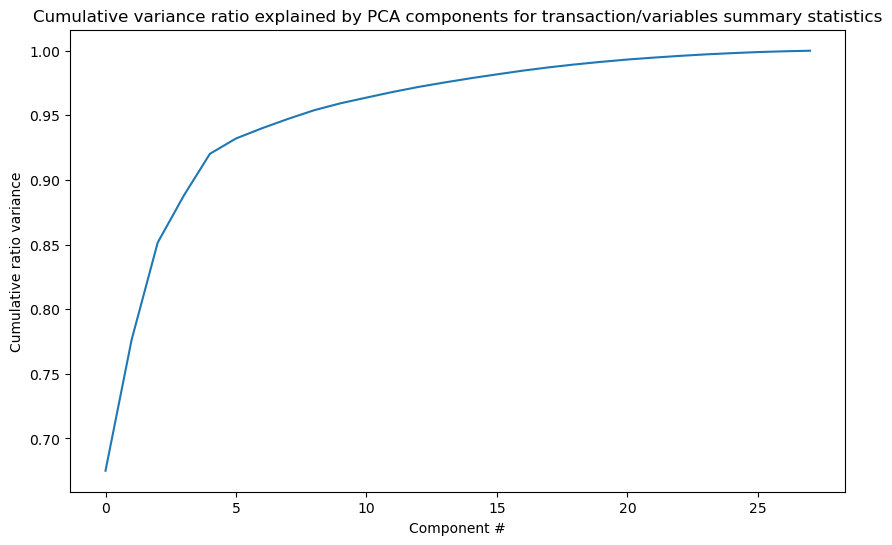

In [12]:
plt.subplots(figsize=(10, 6))
plt.plot(variable_pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component #")
plt.ylabel("Cumulative ratio variance")
plt.title('Cumulative variance ratio explained by PCA components for transaction/variables summary statistics');

In [13]:
df_transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1


In [14]:
df = df_transactions[['Time','V1','V2','V3','V4','V5','Amount','Class']]

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,12.31,1
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,50.00,1
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,119.74,1
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,354.33,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,1.00,1


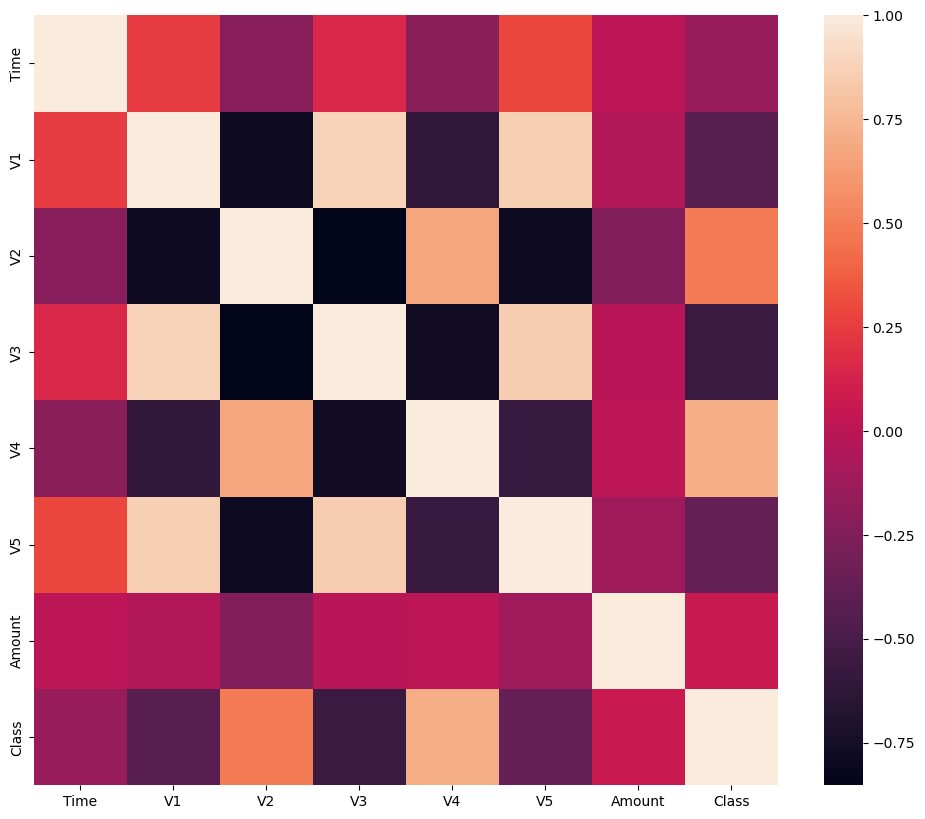

In [16]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True));

In [17]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Class', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Fraud or not')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

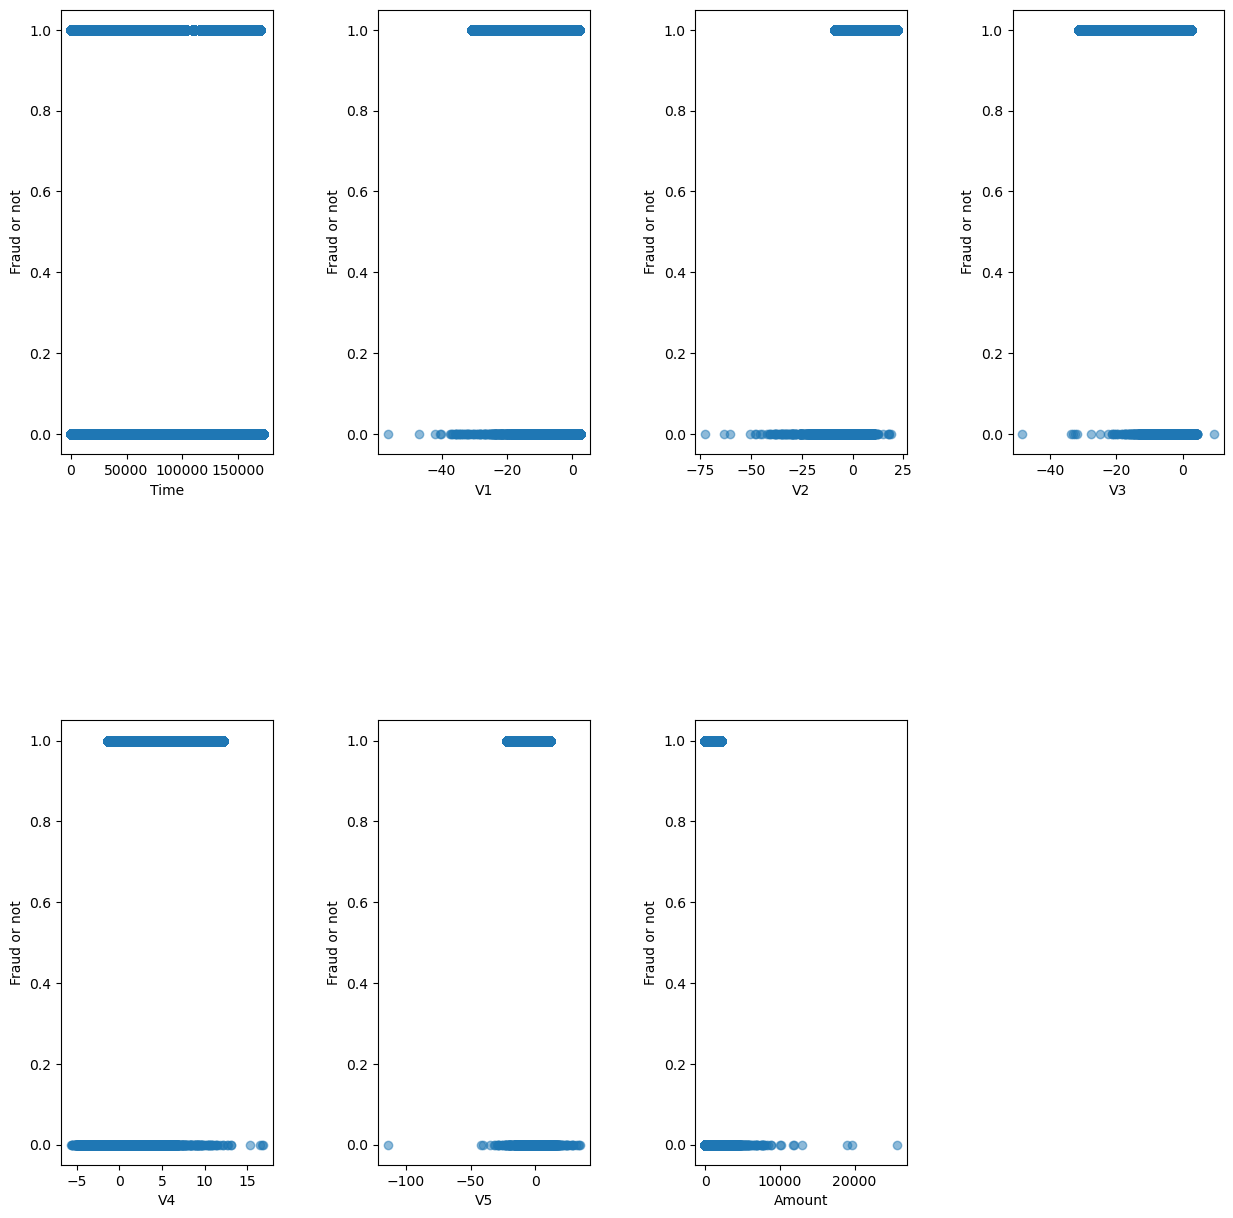

In [18]:
features = [col for col in df.columns if col not in ['Class']]
scatterplots(features, ncol=4, figsize=(15, 15))

In [19]:
df.isna().sum().sort_values()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
Amount    0
Class     0
dtype: int64

In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,87749.312338,-2.385303,1.813584,-3.513309,2.265520,-1.577112,104.914179,0.5
std,48158.104299,5.540865,3.724947,6.227465,3.201838,4.230174,252.634547,0.5
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,0.000000,0.0
25%,46057.000000,-2.866364,-0.145017,-5.118363,-0.106919,-1.796308,1.290000,0.0
50%,80173.500000,-0.773346,0.962831,-1.366354,1.311660,-0.428632,18.960000,0.5
75%,134648.750000,1.042958,2.798780,0.341818,4.243069,0.478230,99.990000,1.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,25691.160000,1.0


In [21]:
df_frauds = df[df["Class"] == 1]

In [22]:
df_frauds.shape

(284315, 8)

In [23]:
df_frauds.describe()

,Time,V1,V2,V3,V4,V5,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,80660.422419,-4.778863,3.633439,-7.038790,4.538901,-3.159677,121.537336,1.0
std,47782.605071,6.798528,4.295320,7.111591,2.865115,5.379446,254.054000,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,0.000000,1.0
25%,41237.000000,-6.003422,1.189757,-8.631802,2.357096,-4.801176,1.000000,1.0
50%,75556.000000,-2.335655,2.715855,-5.076070,4.180779,-1.513022,9.210000,1.0
75%,128471.000000,-0.417340,4.960892,-2.276921,6.348557,0.213863,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,2125.870000,1.0


[  0.     1.     9.21 105.89 824.83]


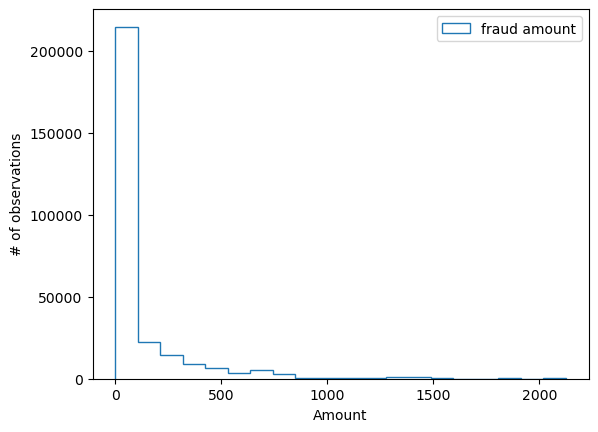

In [24]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(df_frauds["Amount"], percentiles)

# Print the result
print(ptiles_vers)


#sns.countplot(x=df_frauds["Amount"])


fig, ax = plt.subplots()


# Plot a histogram of "Weight" for mens_rowing
ax.hist(df_frauds["Amount"], label = "fraud amount", histtype = "step", bins = 20)


ax.set_xlabel("Amount")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

# Create box plot with Seaborn's default settings
#sns.plot('Amount', data=df_frauds, kind='hist')
#_ = plt.xlabel('fraudulent transactions')
#_ = plt.ylabel('Amount')
#plt.show()


In [25]:
print(df_frauds[df_frauds["Amount"] > 2000])

            Time       V1        V2        V3       V4        V5   Amount  \
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   
...          ...      ...       ...       ...      ...       ...      ...   
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   
176049  122608.0 -2.00346 -7.159042 -4.050976  1.30958 -2.058102  2125.87   

        Class  
176049      1  
176049      1  
176049      1  
176049     

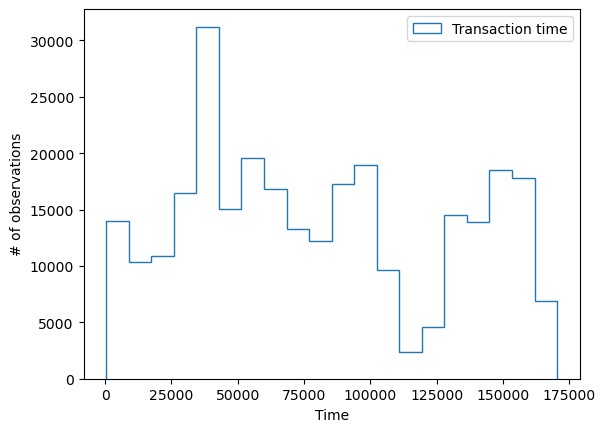

In [26]:
fig, ax = plt.subplots()


# Plot a histogram of "Weight" for mens_rowing
ax.hist(df_frauds["Time"], label = "Transaction time", histtype = "step", bins = 20)


ax.set_xlabel("Time")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()


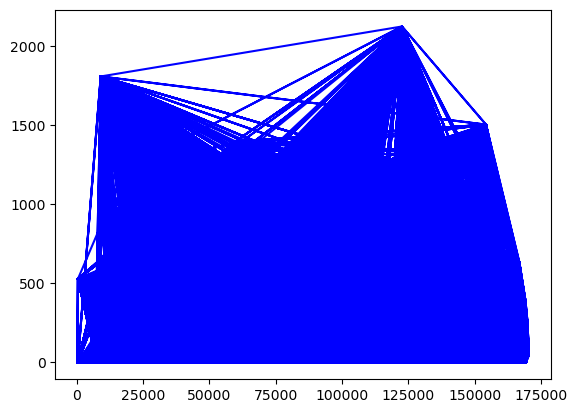

In [27]:
fig, ax = plt.subplots()
ax.plot(df_frauds["Time"], df_frauds["Amount"], color="b")
plt.show()

In [28]:
# Create a dictionary mapping subgroup values to colors

#plt.figure(figsize=(15,16))
# Create a count plot of school with location subgroups
#sns.countplot(x="Amount", data = df_frauds, hue="Time")

# Display plot
#plt.show()


In [29]:
df_frauds[df_frauds["Amount"] < 500]

,Time,V1,V2,V3,V4,V5,Amount,Class
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,12.31,1
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,50.00,1
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,119.74,1
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,354.33,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,1.00,1
...,...,...,...,...,...,...,...,...
229712,146022.0,0.908637,2.849024,-5.647343,6.009415,0.216656,1.18,1
15781,27219.0,-25.266355,14.323254,-26.823673,6.349248,-18.664251,99.99,1
251881,155542.0,1.868226,1.363077,-1.994934,4.173516,1.239751,3.14,1
154234,100924.0,-23.984747,16.697832,-22.209875,9.584969,-16.230439,1.00,1


<Axes: xlabel='Class', ylabel='Amount'>

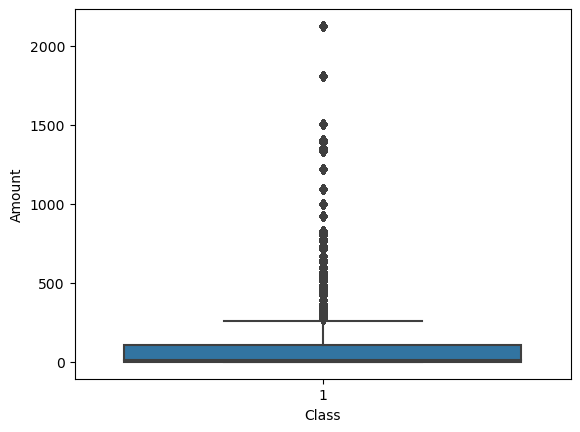

In [30]:
sns.boxplot(x=df_frauds["Class"], y = df_frauds["Amount"])

In [31]:
# Calculate the percentiles
def calculate_outliers(feature):
    seventy_fifth = df_frauds[feature].quantile(0.75)
    twenty_fifth = df_frauds[feature].quantile(0.25)

    # Obtain IQR
    iqr = seventy_fifth - twenty_fifth

    # Upper and lower thresholds
    upper = seventy_fifth + (1.5 * iqr)
    lower = twenty_fifth - (1.5 * iqr)

    # Subset the dataset
    outliers = df_frauds[(df_frauds[feature] < lower) | (df_frauds[feature] > upper)]
    return outliers

In [32]:
# Obtain number of outliers
#print(f'Number of outliers: {len(outliers)}')


NameError: name 'outliers' is not defined

In [33]:
Amount_outliers = calculate_outliers("Amount")
print(f'Number of Amount outliers: {len(Amount_outliers)}')


Number of Amount outliers: 39852


In [34]:
Time_outliers = calculate_outliers("Time")
print(f'Number of Time outliers: {len(Time_outliers)}')


Number of Time outliers: 0


In [35]:
V1_outliers = calculate_outliers("V1")
print(f'Number of V1 outliers: {len(V1_outliers)}')


Number of V1 outliers: 30156


In [36]:
V2_outliers = calculate_outliers("V2")
print(f'Number of V2 outliers: {len(V2_outliers)}')


Number of V2 outliers: 26686


In [37]:
V3_outliers = calculate_outliers("V3")
print(f'Number of V3 outliers: {len(V3_outliers)}')


Number of V3 outliers: 30705


In [38]:
V4_outliers = calculate_outliers("V4")
print(f'Number of V4 outliers: {len(V4_outliers)}')


Number of V4 outliers: 0


In [39]:
V5_outliers = calculate_outliers("V5")
print(f'Number of V5 outliers: {len(V5_outliers)}')


Number of V5 outliers: 26163


In [40]:
type(V5_outliers)

pandas.core.frame.DataFrame

In [66]:
df_frauds_without_outliers = df_frauds[~df_frauds["Amount"].isin(Amount_outliers["Amount"]) & ~df_frauds["V5"].isin(V5_outliers["V5"]) & ~df_frauds["V3"].isin(V3_outliers["V3"]) & ~df_frauds["V2"].isin(V2_outliers["V2"]) & ~df_frauds["V1"].isin(V1_outliers["V1"])]




In [67]:
df_no_frauds = df[df["Class"] == 0]

In [68]:
# Calculate the percentiles
def calculate_outliers_no_frauds(feature):
    seventy_fifth = df_no_frauds[feature].quantile(0.75)
    twenty_fifth = df_no_frauds[feature].quantile(0.25)

    # Obtain IQR
    iqr = seventy_fifth - twenty_fifth

    # Upper and lower thresholds
    upper = seventy_fifth + (1.5 * iqr)
    lower = twenty_fifth - (1.5 * iqr)

    # Subset the dataset
    outliers = df_no_frauds[(df_no_frauds[feature] < lower) | (df_no_frauds[feature] > upper)]
    return outliers

In [69]:
Amount_nof_outliers = calculate_outliers_no_frauds("Amount")
V5_nof_outliers = calculate_outliers_no_frauds("V5")
V4_nof_outliers = calculate_outliers_no_frauds("V4")
V3_nof_outliers = calculate_outliers_no_frauds("V3")
V2_nof_outliers = calculate_outliers_no_frauds("V2")
V1_nof_outliers = calculate_outliers_no_frauds("V1")

In [70]:
df_no_frauds_without_outliers = df_no_frauds[~df_no_frauds["Amount"].isin(Amount_nof_outliers["Amount"]) & ~df_no_frauds["V5"].isin(V5_nof_outliers["V5"]) & ~df_no_frauds["V4"].isin(V4_nof_outliers["V4"]) & ~df_no_frauds["V3"].isin(V3_nof_outliers["V3"]) & ~df_no_frauds["V2"].isin(V2_nof_outliers["V2"]) & ~df_no_frauds["V1"].isin(V1_nof_outliers["V1"])]
print(len(df_no_frauds))
print(len(df_no_frauds_without_outliers))

284315
229459


In [71]:
df_no_frauds_without_outliers.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,3.67,0


In [72]:
df_frauds_without_outliers.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,50.00,1
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,119.74,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,1.00,1
77348,57007.0,-1.271244,2.462675,-2.851395,2.324480,-1.372245,0.01,1
6870,8757.0,-1.863756,3.442644,-4.468260,2.805336,-2.118412,1.00,1


In [73]:
df_data = pd.concat([df_no_frauds_without_outliers, df_frauds_without_outliers], ignore_index=True)

In [74]:
df_data.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,3.67,0


<Axes: xlabel='Class', ylabel='Amount'>

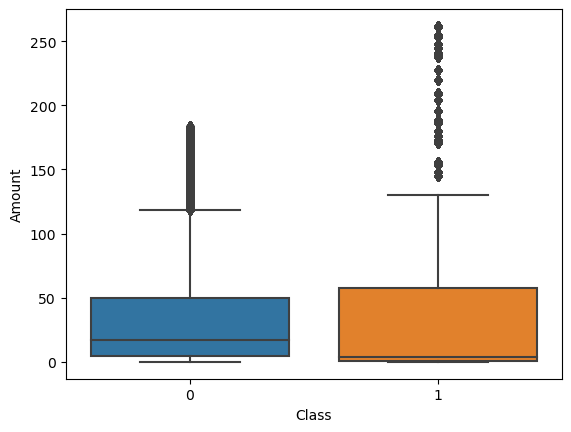

In [75]:
sns.boxplot(x=df_data["Class"], y = df_data["Amount"])

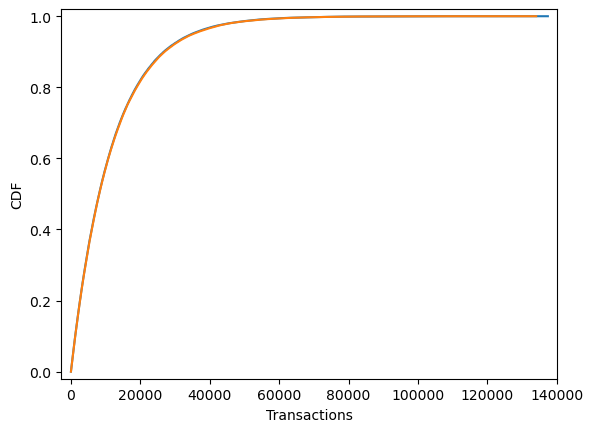

In [85]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y =  np.arange(1, n+1) / n

    return x, y


# Seed random number generator
rng = np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(df_no_frauds_without_outliers)
tau_fraud = np.mean(df_no_frauds_without_outliers)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_data = np.random.exponential(tau, 100000)
inter_data_fraud = np.random.exponential(tau_fraud, 100000)

# Plot the PDF and label axes
#_ = plt.hist(inter_data,
             #bins=50, histtype='step')
#_ = plt.xlabel('Transactions')
#_ = plt.ylabel('PDF')

# Show the plot
#plt.show()




# Create an ECDF from real data: x, y
x, y = ecdf(df_no_frauds_without_outliers)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_data)
x_theor_fraud, y_theor_fraud = ecdf(inter_data_fraud)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x_theor_fraud, y_theor_fraud)
#plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Transactions')
plt.ylabel('CDF')

# Show the plot
plt.show()


In [86]:
from pathlib import Path  
filepath = Path('Data/fraud_no_outliers.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_data.to_csv(filepath)